In [1]:
import GPy 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

 /Users/robertarbon/OneDrive - University of Bristol/Research/optimize_fs_peptide/opt_fs_pep/lib/python3.7/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'covariance': [<matplotlib.contour.QuadContourSet at 0x11e84cda0>]}

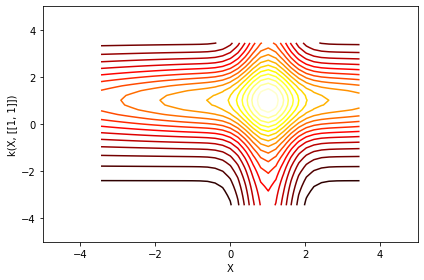

In [2]:
k1 = GPy.kern.ExpQuad(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=4, active_dims=[1]) # works on the second column of X, index=1

k3 = GPy.kern.ExpQuad(input_dim=1, lengthscale=2, active_dims=[0]) # works on the first column of X, index=0
k4 = GPy.kern.ExpQuad(input_dim=1, lengthscale=0.5, active_dims=[1]) # works on the second column of X, index=1

k = k1 * k2 + k3 + k4
k.plot(x=np.array([[1,1]]) , xlim=(-5,5), ylim=(-5,5))

In [3]:
k

sum.,value,constraints,priors
mul.ExpQuad.variance,1.0,+ve,
mul.ExpQuad.lengthscale,1.0,+ve,
mul.ExpQuad_1.variance,1.0,+ve,
mul.ExpQuad_1.lengthscale,4.0,+ve,
ExpQuad.variance,1.0,+ve,
ExpQuad.lengthscale,2.0,+ve,
ExpQuad_1.variance,1.0,+ve,
ExpQuad_1.lengthscale,0.5,+ve,


In [4]:
np.array([[1.0,1.0]]) 

array([[1., 1.]])

In [5]:
x = np.linspace(-3, 3, 5).reshape(-1, 1)
x = np.concatenate([x, x], axis=1)
x

array([[-3. , -3. ],
       [-1.5, -1.5],
       [ 0. ,  0. ],
       [ 1.5,  1.5],
       [ 3. ,  3. ]])

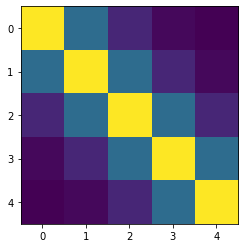

In [6]:
plt.imshow(k.K(x))

In [7]:
xx, yy = np.mgrid[-3:3:20j, -3:3:20j]
X = np.vstack((xx.flatten(), yy.flatten())).T

In [8]:
X[:10, ]

array([[-3.        , -3.        ],
       [-3.        , -2.68421053],
       [-3.        , -2.36842105],
       [-3.        , -2.05263158],
       [-3.        , -1.73684211],
       [-3.        , -1.42105263],
       [-3.        , -1.10526316],
       [-3.        , -0.78947368],
       [-3.        , -0.47368421],
       [-3.        , -0.15789474]])

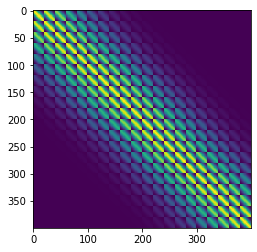

In [9]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=2, variance=2, active_dims=[1]) # works on the second column of X, index=1
k_mult = k1*k2
plt.imshow(k_mult.K(X))

In [10]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=1,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=2, variance=4, active_dims=[1]) # works on the second column of X, index=1
k_mult_1 = k1*k2
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=2, variance=2, active_dims=[1]) # works on the second column of X, index=1
k_mult_2 = k1*k2

(k_mult_1.K(X) - k_mult_2.K(X)).sum()

0.0

In [11]:
GPy.kern.RBF?

In [16]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k_mult = k1*k2
k_add = k1 + k2

In [13]:
z_mult = np.random.multivariate_normal(np.zeros(X.shape[0]), 2*k_mult.K(X))
z_add = np.random.multivariate_normal(np.zeros(X.shape[0]), 2*k_add.K(X))

NameError: name 'k_add' is not defined

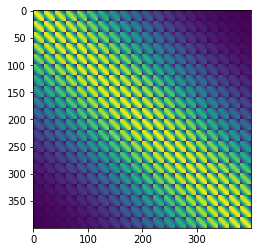

In [14]:
plt.imshow(k_mult.K(X))

In [15]:
plt.imshow(k_add.K(X))

NameError: name 'k_add' is not defined

Multiplicative kernel with additive data

In [ ]:
k_mult_add = k1*k2
m_mult_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_mult_add)
m_mult_add.optimize_restarts(verbose=False)
plt.imshow(k_mult_add.K(X))

Multiplicative kernel with multiplicative data

In [ ]:
k_mult_mult = k1*k2

m_mult_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_mult_mult)
m_mult_mult.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult.K(X))

In [ ]:
k_mult_mult_add = k1*k2 + k1 + k2

m_mult_mult_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_mult_mult_add)
m_mult_mult_add.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult_add.K(X))

In [ ]:
m_mult_mult_add

Additive kernel with additive data

In [ ]:
k_add_add = k1 + k2

m_add_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_add_add)
m_add_add.optimize_restarts(verbose=False)
plt.imshow(k_add_add.K(X))

Additive kernel with multiplicative data

In [ ]:
k_add_mult = k1 + k2

m_add_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_add_mult)
m_add_mult.optimize_restarts(verbose=False)
plt.imshow(k_add_mult.K(X))

In [ ]:
def rmsd(m, Xnew=X):
    y_pred, _ = m.predict(Xnew)
    y_obs = m.Y
    return np.sqrt(np.sum((y_pred-y_obs)**2))

In [ ]:
print(rmsd(m_mult_mult)*100)
print(rmsd(m_mult_add)*100)
print(rmsd(m_add_mult)*100)
print(rmsd(m_add_add)*100)
print(rmsd(m_mult_mult_add)*100)

In [ ]:
m_mult_mult

In [ ]:
m_mult_add